In [1]:
!pip install moviepy

In [1]:
import moviepy.editor

In [13]:
video=moviepy.editor.VideoFileClip('lifeback_testing.mp4')

In [14]:
audio=video.audio.write_audiofile('testing01.wav')

chunk:   0%|                                                                      | 0/123591 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in testing01.wav


MoviePy - Done.


In [2]:
from scipy.io import wavfile
samplerate, data = wavfile.read('testing01.wav')

In [16]:
type(data)

numpy.ndarray

In [17]:
samplerate

44100

In [5]:
!pip install opensmile

In [2]:
import opensmile

In [3]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

 I got an error SoX could not be found!, so after referring to stackoverflow I have downloaded it from mentioned link if you also receive the same error kindly download it. Link :https://sourceforge.net/projects/sox/files/sox/ 

In [14]:
smile

In [ ]:
smile.n

In [13]:
y = smile.process_file('testing01.wav')

RuntimeError: Input signal has 2 channels, but 'num_channels' to set to 1.

In [2]:
!pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=f326d2e5a76f2cba48a997d882febafd1c987252add5de6bcafe1f394e5fd08b
  Stored in directory: c:\users\tanmey\appdata\local\pip\cache\wheels\de\1e\aa\d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23145 sha256=a54e6780428ecc71616c5b64a5021b4ea229da36e5025b58a9757992336aea77
  Stored in directory: c:\users\tanmey\appdata\local\pip\cache\wheels\ba\7b\eb\213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320723 sha256=1edcd72fb22ab906ed2a45b3831bb294b10d32105ba9555e7644a00dfb3b2c5a
  Stored in directory: c:\users\tanmey\appdata\local\pip\cache\wheels\a0\18\0a\8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built librosa audioread resampy


In [4]:
import librosa, librosa.display

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
audio_folder='T:/lifeback_2020/kaggle_task/rfcx-species-audio-detection/train'

In [25]:
files = list(os.listdir(audio_folder))
len(files)

4727

In [7]:
signal,sr=librosa.load('T:/lifeback_2020/kaggle_task/rfcx-species-audio-detection/train/00ad36516.flac')

In [14]:
type(signal)

numpy.ndarray

In [12]:
sr

22050

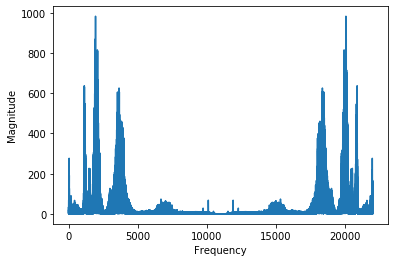

In [17]:
fft = np.fft.fft(signal)
spectrum = np.abs(fft)

f = np.linspace(0, sr, len(spectrum))
plt.plot(f, spectrum)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [18]:

hop_length = 512 #number of short fast fourier transforms
n_fft = 2048 #number of samples in each short fft

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

print("Hop length duration is: %fs" %(hop_length_duration))
print("FFT Window duration is: %fs" %(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

Hop length duration is: 0.023220s
FFT Window duration is: 0.092880s


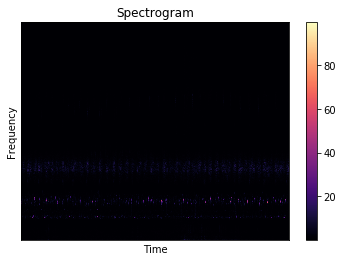

In [19]:
spectrogram = np.abs(stft)

# display spectrogram
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show()

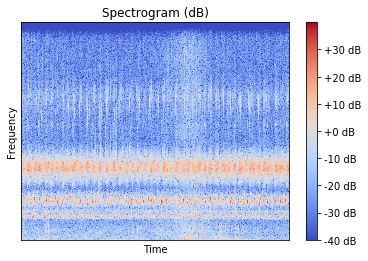

In [20]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

In [26]:
from skimage.io import imsave, imread
import pylab
from tqdm import tqdm

image_folder = 'T:/lifeback_2020/kaggle_task/images'

spectrograms = []
def save_spectrogram(spectrogram, fig_size,fig_label, image_folder):
  fig = pylab.figure()
  
  fig.set_size_inches((fig_size[0]/fig.get_dpi(), fig_size[1]/fig.get_dpi()))
  
  pylab.axis('off') 
  pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
  librosa.display.specshow(spectrogram)
  img_file = os.path.join(image_folder, fig_label)
  pylab.savefig(img_file+'.png', bbox_inches=None, pad_inches=0)
  pylab.close()

  4%|███▏                                                                         | 193/4727 [20:47<5:56:54,  4.72s/it]

MemoryError: Unable to allocate 80.8 MiB for an array with shape (2648600, 4) and data type float64

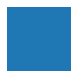

In [32]:
for audio in tqdm(files):
  audio_file = os.path.join(audio_folder,audio)
  signal, sr = librosa.load(audio_file)
  # perform stft
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  spectrogram = np.abs(stft)
  log_spectrogram = librosa.amplitude_to_db(spectrogram)
  save_spectrogram(log_spectrogram, fig_size = (64,64), fig_label = audio, image_folder = image_folder)

In [29]:
!pip install opencv-python

In [30]:

import cv2
images = os.listdir(image_folder)
print (len(images))
image_path = os.path.join(image_folder, images[0])

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
print (img.shape)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

0


IndexError: list index out of range

digression

In [8]:
y = smile.process_file('T:/lifeback_2020/kaggle_task/rfcx-species-audio-detection/train/00ad36516.flac')

In [11]:
temp=y.columns

In [12]:
if "loudness" in temp:
    print("Eureka")
else:
    print('What Happened')

What Happened


In [13]:
temp

Index(['audspec_lengthL1norm_sma_range', 'audspec_lengthL1norm_sma_maxPos',
       'audspec_lengthL1norm_sma_minPos', 'audspec_lengthL1norm_sma_quartile1',
       'audspec_lengthL1norm_sma_quartile2',
       'audspec_lengthL1norm_sma_quartile3', 'audspec_lengthL1norm_sma_iqr1-2',
       'audspec_lengthL1norm_sma_iqr2-3', 'audspec_lengthL1norm_sma_iqr1-3',
       'audspec_lengthL1norm_sma_percentile1.0',
       ...
       'mfcc_sma_de[14]_peakRangeAbs', 'mfcc_sma_de[14]_peakRangeRel',
       'mfcc_sma_de[14]_peakMeanAbs', 'mfcc_sma_de[14]_peakMeanMeanDist',
       'mfcc_sma_de[14]_peakMeanRel', 'mfcc_sma_de[14]_minRangeRel',
       'mfcc_sma_de[14]_meanRisingSlope', 'mfcc_sma_de[14]_stddevRisingSlope',
       'mfcc_sma_de[14]_meanFallingSlope',
       'mfcc_sma_de[14]_stddevFallingSlope'],
      dtype='object', length=6373)